In [38]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [39]:
df_final = pd.read_csv('../data/preproccessed-props-pinamar.csv')

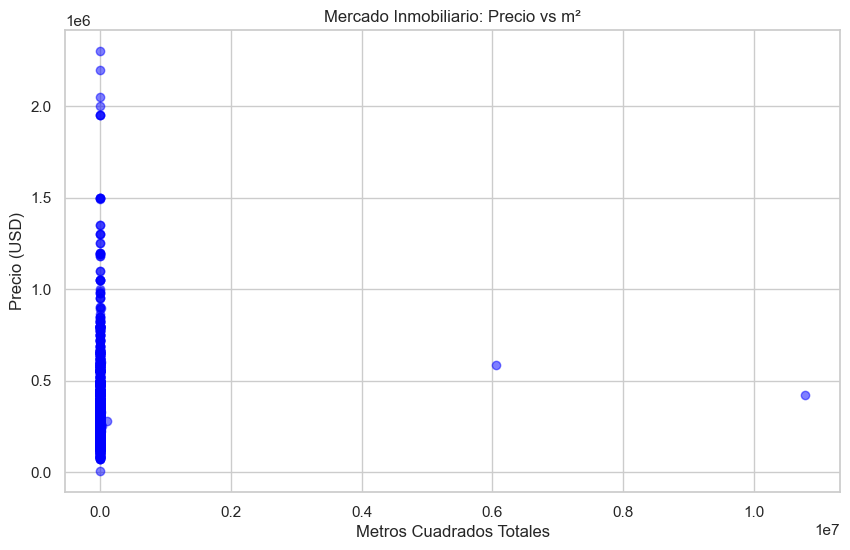

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['m2'], df_final['precio'], color='blue', alpha=0.5)
plt.title('Mercado Inmobiliario: Precio vs m²')
plt.xlabel('Metros Cuadrados Totales')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/351294538.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='dormitorios', y='precio', palette="Blues")
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/351294538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='baños', y='precio', palette="Greens")
/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/351294538.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='cocheras', y='precio', palet

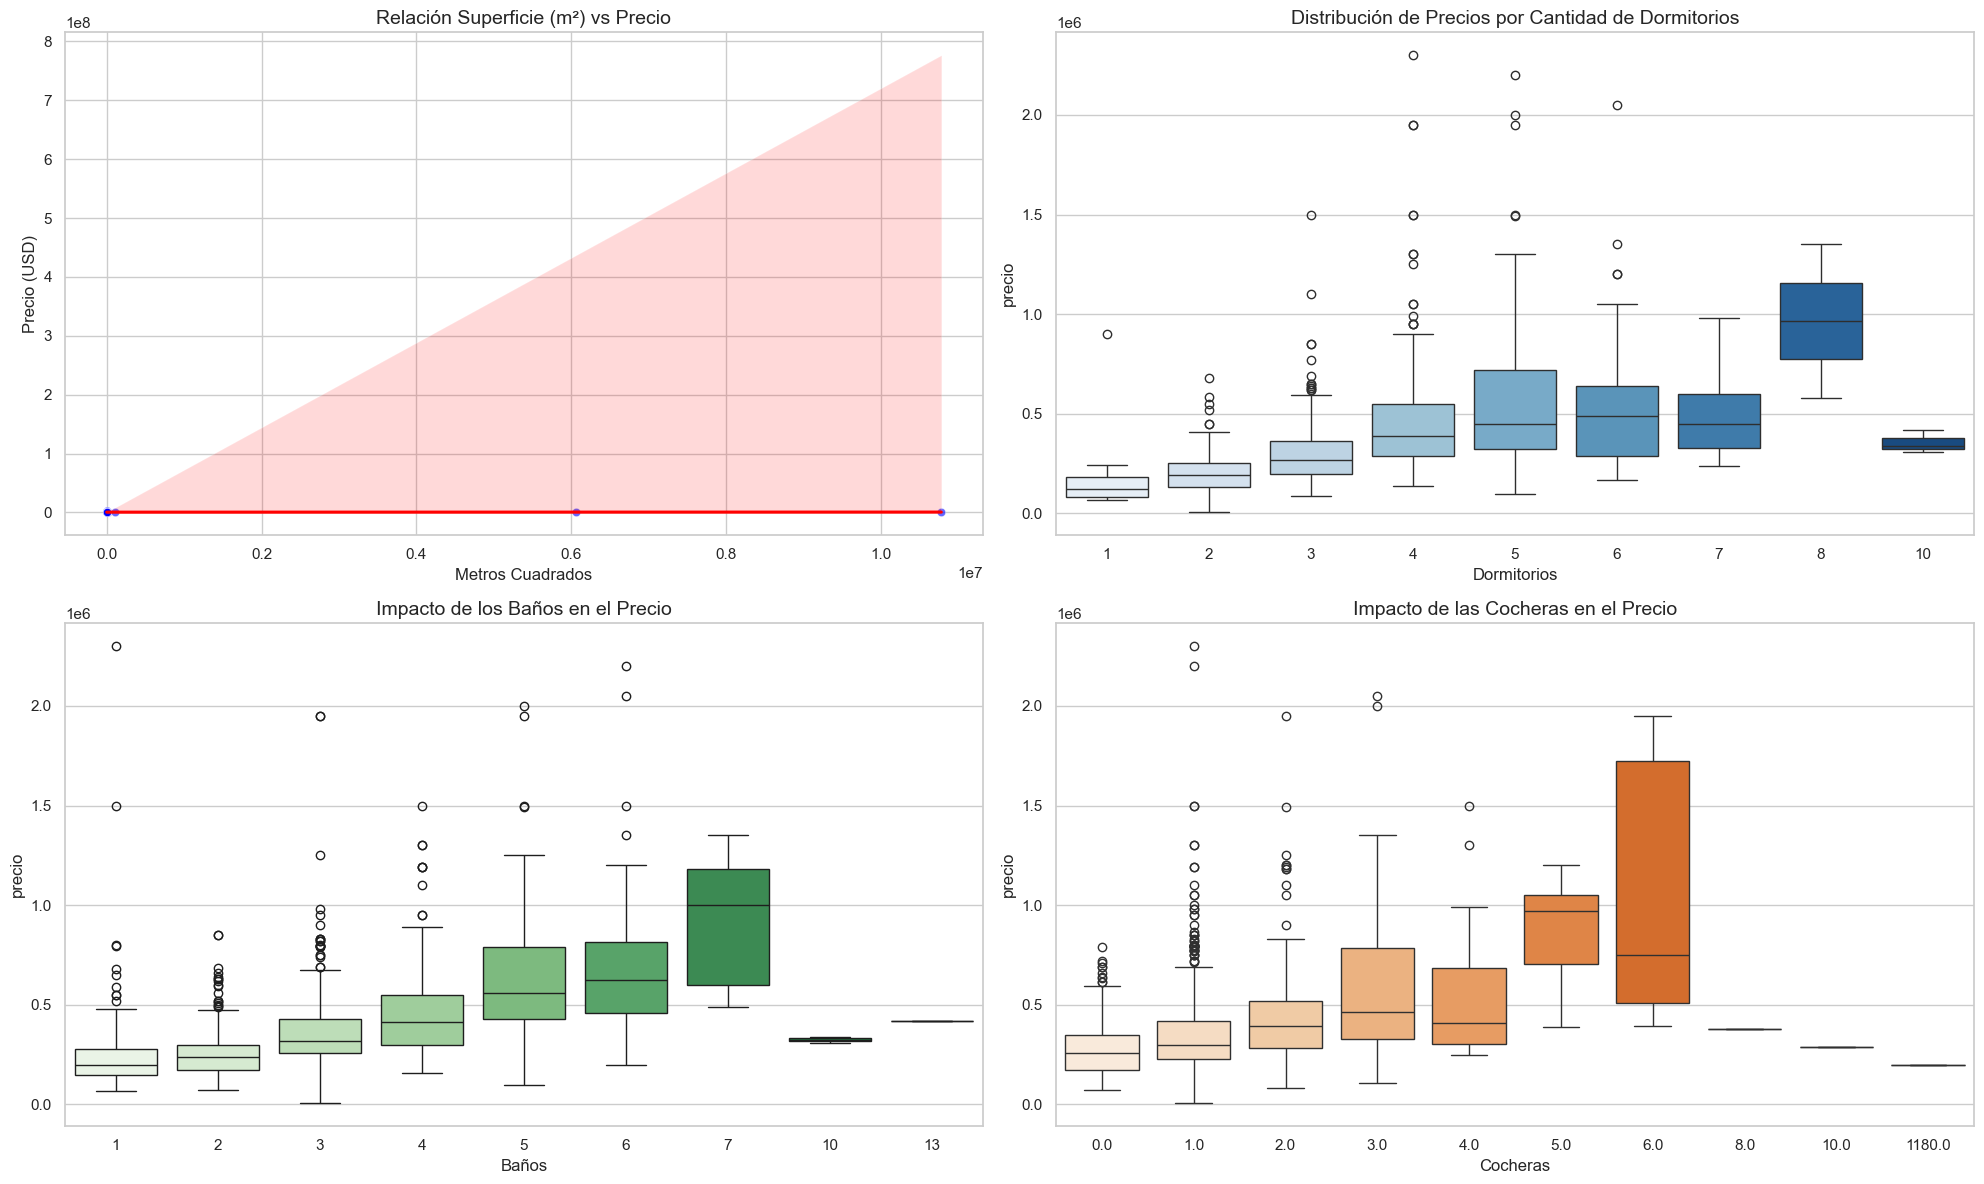

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 12))

df_final['m2'] = pd.to_numeric(df_final['m2'], errors='coerce')
df_final = df_final.dropna(subset=['m2'])
df_final['m2'] = df_final['m2'].astype(float)

# M2 vs PRECIO
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_final, x='m2', y='precio', alpha=0.6, color='blue')
sns.regplot(data=df_final, x='m2', y='precio', scatter=False, color='red')
plt.title('Relación Superficie (m²) vs Precio', fontsize=14)
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio (USD)')

# DORMITORIOS vs PRECIO
plt.subplot(2, 2, 2)
sns.boxplot(data=df_final, x='dormitorios', y='precio', palette="Blues")
plt.title('Distribución de Precios por Cantidad de Dormitorios', fontsize=14)
plt.xlabel('Dormitorios')

#BAÑOS vs PRECIO
plt.subplot(2, 2, 3)
sns.boxplot(data=df_final, x='baños', y='precio', palette="Greens")
plt.title('Impacto de los Baños en el Precio', fontsize=14)
plt.xlabel('Baños')

#COCHERAS vs PRECIO
plt.subplot(2, 2, 4)
sns.boxplot(data=df_final, x='cocheras', y='precio', palette="Oranges")
plt.title('Impacto de las Cocheras en el Precio', fontsize=14)
plt.xlabel('Cocheras')

plt.tight_layout()
plt.show()

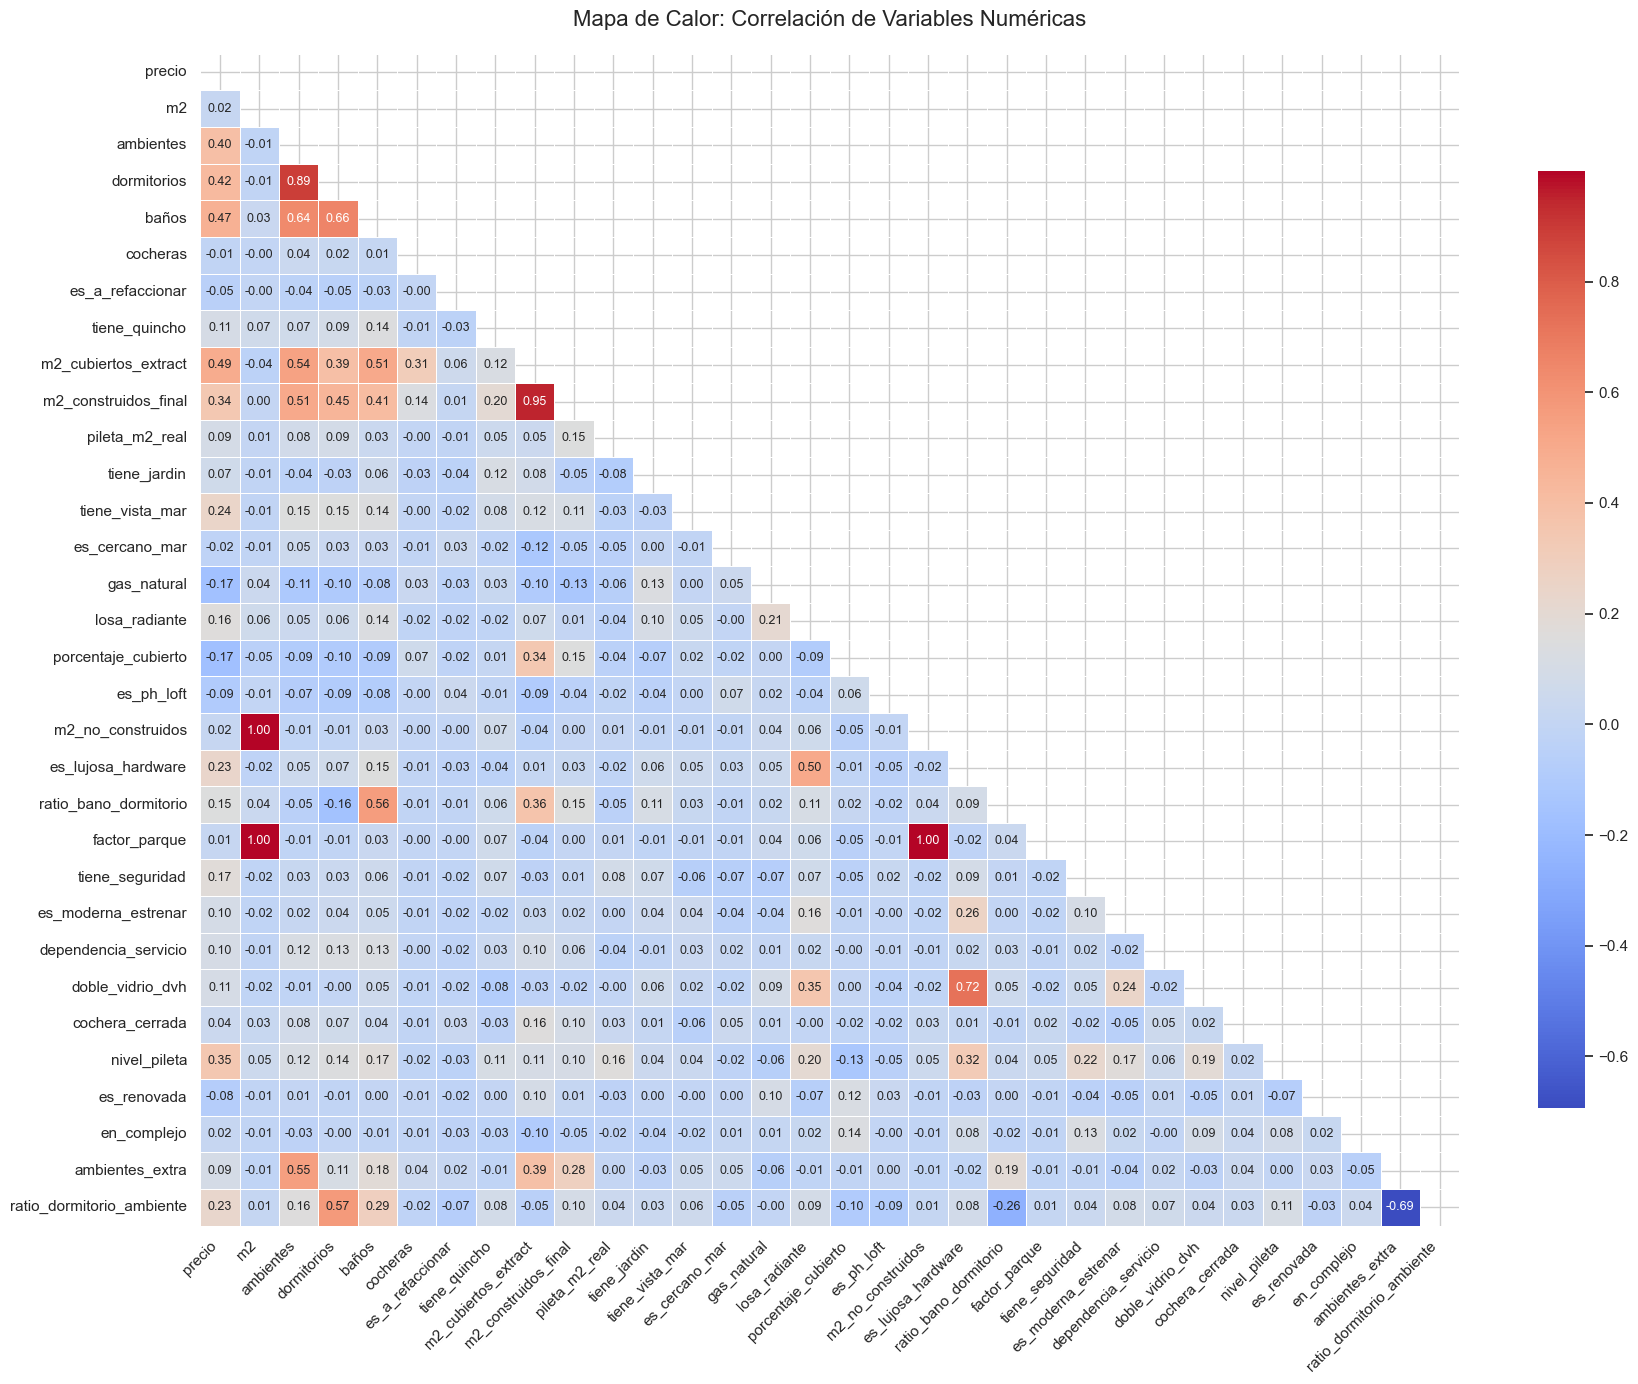


 IMPACTO EN EL PRECIO (Correlación Lineal):
m2_cubiertos_extract      | Correlación:  0.49 | Moderado (+)
baños                     | Correlación:  0.47 | Moderado (+)
dormitorios               | Correlación:  0.42 | Moderado (+)
ambientes                 | Correlación:  0.40 | Moderado (+)
nivel_pileta              | Correlación:  0.35 | Moderado (+)
m2_construidos_final      | Correlación:  0.34 | Moderado (+)
tiene_vista_mar           | Correlación:  0.24 | Moderado (+)
es_lujosa_hardware        | Correlación:  0.23 | Moderado (+)
ratio_dormitorio_ambiente | Correlación:  0.23 | Moderado (+)
tiene_seguridad           | Correlación:  0.17 | Débil / Neutro
losa_radiante             | Correlación:  0.16 | Débil / Neutro
ratio_bano_dormitorio     | Correlación:  0.15 | Débil / Neutro
tiene_quincho             | Correlación:  0.11 | Débil / Neutro
doble_vidrio_dvh          | Correlación:  0.11 | Débil / Neutro
dependencia_servicio      | Correlación:  0.10 | Débil / Neutro
es_moderna_es

In [42]:
# MATRIZ DE CORRELACIÓN
# numeric_only=True evita errores con las columnas de texto (descripción, dirección, etc.)
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 14)) # Tamaño grande para que los números no se pisen

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap='coolwarm',   # Azul para inversa (-), Rojo para directa (+)
    annot=True,        # Mostrar los números
    fmt=".2f",         # Redondear a 2 decimales
    linewidths=0.5,    # Líneas de separación
    cbar_kws={"shrink": .8}, # Tamaño de la barra lateral
    annot_kws={"size": 9}    # Tamaño de la fuente de los números
)

plt.title('Mapa de Calor: Correlación de Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n IMPACTO EN EL PRECIO (Correlación Lineal):")

corr_precio = corr_matrix['precio'].drop('precio').sort_values(ascending=False)

for variable, valor in corr_precio.items():
    if valor > 0.5:
        impacto = "Fuerte (+)"
    elif valor > 0.2:
        impacto = "Moderado (+)"
    elif valor > -0.2 and valor < 0.2:
        impacto = "Débil / Neutro"
    elif valor < -0.5:
        impacto = "Fuerte Inversa (-)"
    else:
        impacto = "Moderado Inversa (-)"
        
    print(f"{variable:<25} | Correlación: {valor:>5.2f} | {impacto}")

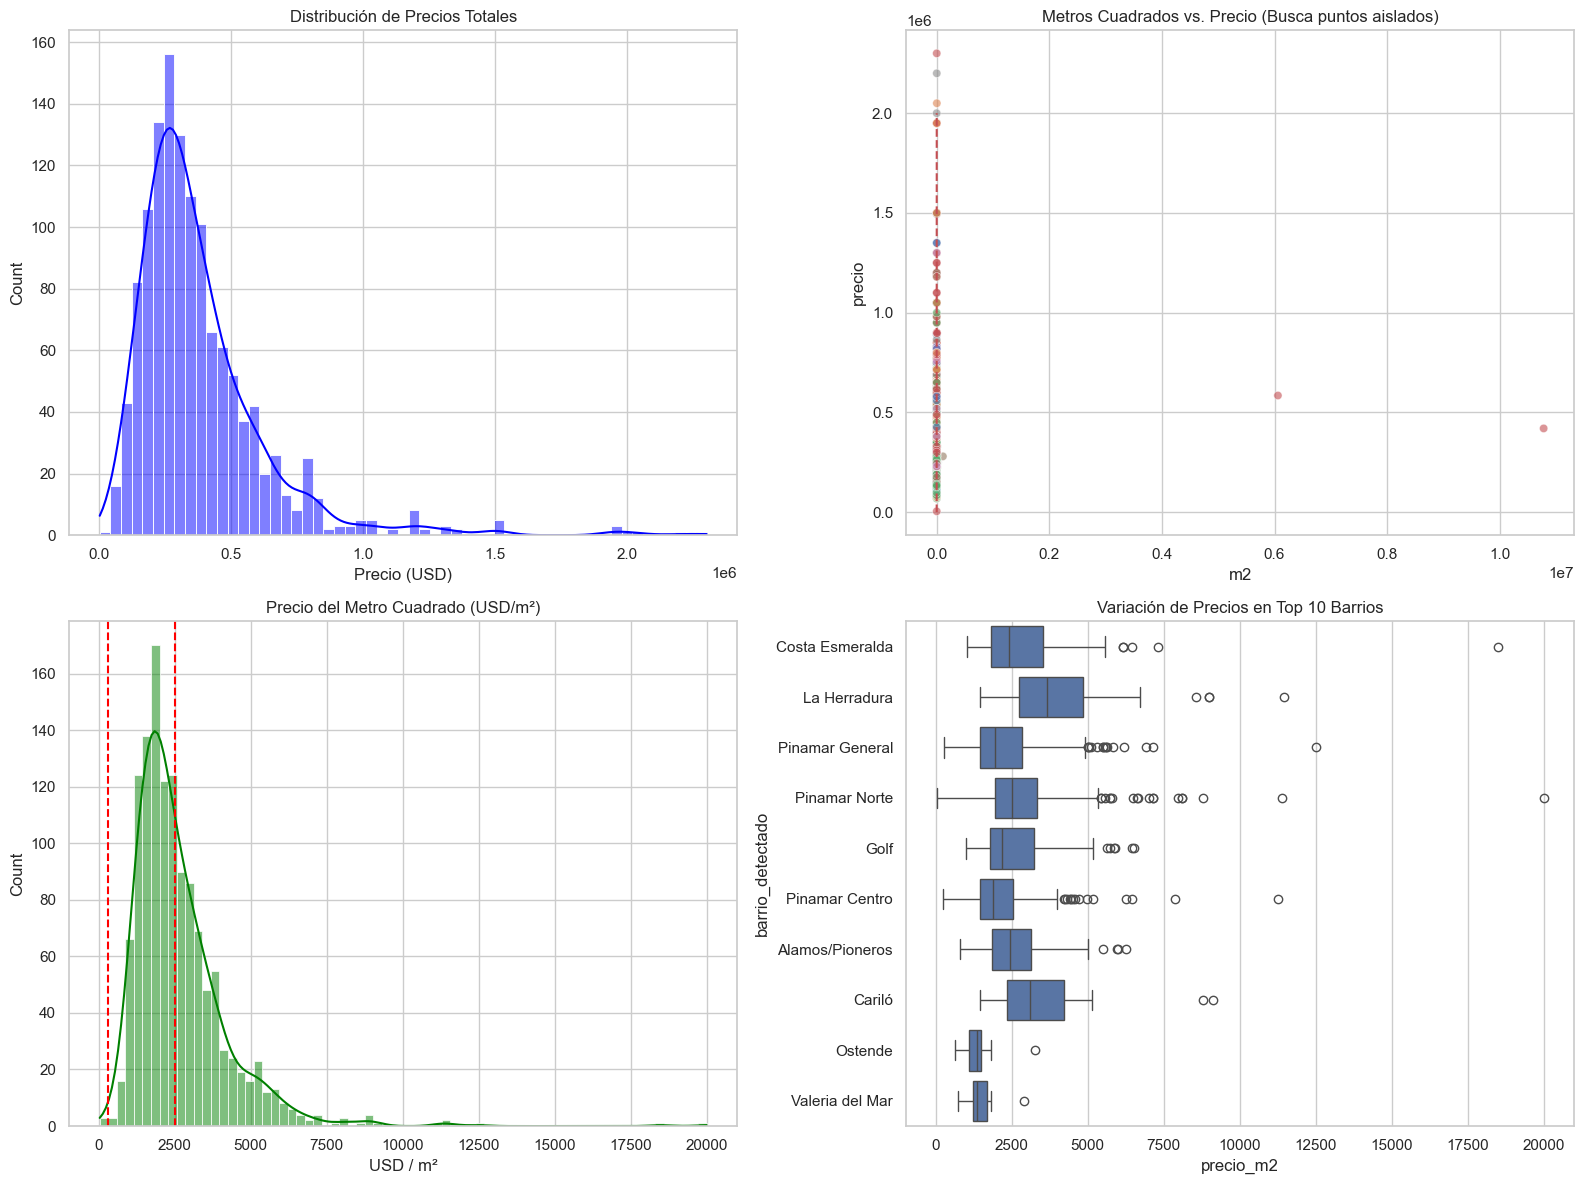

REPORTE DE SOSPECHOSOS
Mínimo precio detectado: USD 4,500
Máximo precio detectado: USD 2,300,000
Mínimos m2 detectados: 12.0 m²
Máximos m2 detectados: 10779400.0 m²

Casos extremos (Outliers de Precio/m2):
     barrio_detectado      m2     precio     precio_m2
45      Pinamar Norte   873.0  1950000.0  11403.508772
316      La Herradura   630.0  1500000.0  11450.381679
436     Pinamar Norte   774.0  2300000.0  20000.000000
521     Pinamar Norte   736.0     4500.0     34.883721
602    Pinamar Centro   900.0  1500000.0  11278.195489
953   Costa Esmeralda  1125.0  1350000.0  18493.150685
1032  Pinamar General   983.0   270000.0    274.669379
1100  Pinamar General    12.0   135000.0  12500.000000
1178   Pinamar Centro   721.0   168000.0    233.009709


In [43]:
df_audit = df_final.copy()
df_audit['precio_m2'] = df_audit['precio'] / df_audit['m2_construidos_final']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Histograma de Precios
sns.histplot(df_audit['precio'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribución de Precios Totales')
axes[0, 0].set_xlabel('Precio (USD)')

# Metros vs. Precio
sns.scatterplot(data=df_audit, x='m2', y='precio', hue='barrio_detectado', alpha=0.6, legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Metros Cuadrados vs. Precio (Busca puntos aislados)')
axes[0, 1].plot([0, 1000], [0, 1000*2000], 'r--', label='Referencia 2000 USD/m2') # Línea de referencia

#Histograma Precio por M2
sns.histplot(df_audit['precio_m2'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Precio del Metro Cuadrado (USD/m²)')
axes[1, 0].set_xlabel('USD / m²')
axes[1, 0].axvline(300, color='red', linestyle='--')  # Límite bajo sospechoso
axes[1, 0].axvline(2500, color='red', linestyle='--') # Límite alto sospechoso

# Boxplot Barrios (mas comunes)
top_barrios = df_audit['barrio_detectado'].value_counts().head(10).index
sns.boxplot(data=df_audit[df_audit['barrio_detectado'].isin(top_barrios)], 
            x='precio_m2', y='barrio_detectado', ax=axes[1, 1])
axes[1, 1].set_title('Variación de Precios en Top 10 Barrios')

plt.tight_layout()
plt.show()

print("REPORTE DE SOSPECHOSOS")
print(f"Mínimo precio detectado: USD {df_audit['precio'].min():,.0f}")
print(f"Máximo precio detectado: USD {df_audit['precio'].max():,.0f}")
print(f"Mínimos m2 detectados: {df_audit['m2'].min()} m²")
print(f"Máximos m2 detectados: {df_audit['m2'].max()} m²")
print("\nCasos extremos (Outliers de Precio/m2):")
print(df_audit[(df_audit['precio_m2'] < 300) | (df_audit['precio_m2'] > 10000)][['barrio_detectado', 'm2', 'precio', 'precio_m2']])

In [44]:
import pandas as pd

# Definir cuál es la mejor columna de m2 construidos (priorizando la calculada)
col_m2_constr = 'm2_construidos_final' if 'm2_construidos_final' in df_final.columns else 'm2'

mask_valida = (df_final['precio'] > 1000) & (df_final['m2'] > 10) & (df_final[col_m2_constr] > 10)
df_stats = df_final[mask_valida].copy()

# variables derivadas
df_stats['precio_x_m2_constr'] = df_stats['precio'] / df_stats[col_m2_constr]

def reporte_estadistico_profesional(serie, nombre_metrica):
    percentiles = [0.015, 0.10, 0.25, 0.50, 0.75, 0.90, 0.985]
    desc = serie.describe(percentiles=percentiles)
    
    coef_variacion = (desc['std'] / desc['mean']) * 100
    asimetria = serie.skew()
    
    print(f"ANALISIS DE: {nombre_metrica.upper()}")
    
    print("\nTENDENCIA CENTRAL")
    print(f"   Media (Promedio):      {desc['mean']:,.2f}")
    print(f"   Mediana (50%):         {desc['50%']:,.2f}")
    
    print("\nDISPERSION")
    print(f"   Desviacion Estandar:   {desc['std']:,.2f}")
    print(f"   Coef. Variacion (CV):  {coef_variacion:.2f}%")
    
    print("\nDISTRIBUCION (Percentiles)")
    print(f"   Minimo Absoluto:       {desc['min']:,.2f}")
    print(f"   P 2.5%  (Piso Real):   {desc['1.5%']:,.2f}")
    print(f"   P 10%   (Bajo):        {desc['10%']:,.2f}")
    print(f"   P 25%   (Q1):          {desc['25%']:,.2f}")
    print(f"   P 50%   (Mediana):     {desc['50%']:,.2f}")
    print(f"   P 75%   (Q3):          {desc['75%']:,.2f}")
    print(f"   P 90%   (Alto):        {desc['90%']:,.2f}")
    print(f"   P 97.5% (Techo Real):  {desc['98.5%']:,.2f}")
    print(f"   Maximo Absoluto:       {desc['max']:,.2f}")


reporte_estadistico_profesional(df_stats['precio'], "Precio de Venta (USD)")

reporte_estadistico_profesional(df_stats['m2'], "Superficie Total (m2 Lote)")

reporte_estadistico_profesional(df_stats['precio_x_m2_constr'], "Valor del M2 Construido (USD/m2)")

ANALISIS DE: PRECIO DE VENTA (USD)

TENDENCIA CENTRAL
   Media (Promedio):      379,772.03
   Mediana (50%):         320,000.00

DISPERSION
   Desviacion Estandar:   249,630.47
   Coef. Variacion (CV):  65.73%

DISTRIBUCION (Percentiles)
   Minimo Absoluto:       4,500.00
   P 2.5%  (Piso Real):   89,000.00
   P 10%   (Bajo):        165,000.00
   P 25%   (Q1):          230,000.00
   P 50%   (Mediana):     320,000.00
   P 75%   (Q3):          450,000.00
   P 90%   (Alto):        650,000.00
   P 97.5% (Techo Real):  1,200,000.00
   Maximo Absoluto:       2,300,000.00
ANALISIS DE: SUPERFICIE TOTAL (M2 LOTE)

TENDENCIA CENTRAL
   Media (Promedio):      13,950.83
   Mediana (50%):         742.50

DISPERSION
   Desviacion Estandar:   344,433.31
   Coef. Variacion (CV):  2468.91%

DISTRIBUCION (Percentiles)
   Minimo Absoluto:       12.00
   P 2.5%  (Piso Real):   75.00
   P 10%   (Bajo):        183.70
   P 25%   (Q1):          354.50
   P 50%   (Mediana):     742.50
   P 75%   (Q3):         

In [45]:
if 'm2_construidos_final' in df_final.columns:
    col_m2 = 'm2_construidos_final'
else:
    col_m2 = 'm2' 

MIN_PRECIO = 89000   
MAX_PRECIO = 1200000 
MIN_M2 = 75
MAX_M2 = 2230          
PRECIO_M2_MIN = 838
PRECIO_M2_MAX = 7105

mask_limpieza = (
    (df_final['precio'] >= MIN_PRECIO) & 
    (df_final['precio'] <= MAX_PRECIO) &
    (df_final[col_m2] >= MIN_M2) & 
    (df_final[col_m2] <= MAX_M2) & 
    ((df_final['precio'] / df_final[col_m2]) >= PRECIO_M2_MIN) &
    ((df_final['precio'] / df_final[col_m2]) <= PRECIO_M2_MAX)
)

df_training = df_final[mask_limpieza].copy()

print(f"Eliminados: {len(df_final) - len(df_training)} registros")

if len(df_training) > 0:
    cv_viejo = (df_final['precio'].std() / df_final['precio'].mean()) * 100
    cv_nuevo = (df_training['precio'].std() / df_training['precio'].mean()) * 100
    print(f"Coeficiente de Variacion:")
    print(f"   Antes: {cv_viejo:.2f}%  ->  Ahora: {cv_nuevo:.2f}%")
else:
    print("filtro  muy agresivo, no hay datos")

Eliminados: 98 registros
Coeficiente de Variacion:
   Antes: 65.73%  ->  Ahora: 50.36%


In [46]:
df_training['precio_m2'] = df_training['precio'] / df_training['m2_construidos_final'].replace(0, 1)

# Casas donde lo construido es más del triple que el terreno total
filtro_logico_1 = df_training['m2_construidos_final'] > (df_training['m2'] * 3)

# Precios ridículos por m2
filtro_logico_2 = (df_training['precio_m2'] < 200) | (df_training['precio_m2'] > 5000)

#ESTADÍSTICA POR BARRIO / calcula los "bigotes" para CADA barrio y borra lo que se salga.
def detectar_outliers_iqr(grupo):
    Q1 = grupo['precio_m2'].quantile(0.25)
    Q3 = grupo['precio_m2'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return (grupo['precio_m2'] < limite_inf) | (grupo['precio_m2'] > limite_sup)

outliers_iqr = df_training.groupby('barrio_detectado', group_keys=False).apply(detectar_outliers_iqr)

# Isolation Forest / busca "combinaciones raras" (ej: 1 ambiente, 5 baños y 1000m2).
cols_para_if = ['m2', 'm2_construidos_final', 'dormitorios', 'baños', 'precio']
cols_if_reales = [c for c in cols_para_if if c in df_training.columns]
data_if = df_training[cols_if_reales].fillna(df_training[cols_if_reales].median())

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_training['es_outlier_IA'] = iso_forest.fit_predict(data_if)

print(f"\nTotal de propiedades antes de limpiar: {len(df_training)}")
print(f"Fallan Lógica de m2 o Precio: {(filtro_logico_1 | filtro_logico_2).sum()} casos")
print(f"Fallan IQR (Caros/Baratos para su barrio): {outliers_iqr.sum()} casos")
print(f"Detectados por IA (Combinaciones raras): {(df_training['es_outlier_IA'] == -1).sum()} casos")

df_limpio = df_training[
    (~filtro_logico_1) & 
    (~filtro_logico_2) & 
    (~outliers_iqr) & 
    (df_training['es_outlier_IA'] == 1)
].copy()

df_limpio = df_limpio.drop(columns=['es_outlier_IA'])

print(f"Total de propiedades DESPUÉS de limpiar: {len(df_limpio)}")
print(f"Eliminadas {len(df_training) - len(df_limpio)} propiedades ruidosas.")


Total de propiedades antes de limpiar: 1190
Fallan Lógica de m2 o Precio: 66 casos
Fallan IQR (Caros/Baratos para su barrio): 51 casos
Detectados por IA (Combinaciones raras): 12 casos
Total de propiedades DESPUÉS de limpiar: 1098
Eliminadas 92 propiedades ruidosas.


/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/1548946833.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_iqr = df_training.groupby('barrio_detectado', group_keys=False).apply(detectar_outliers_iqr)



Variables Numéricas vs Precio 


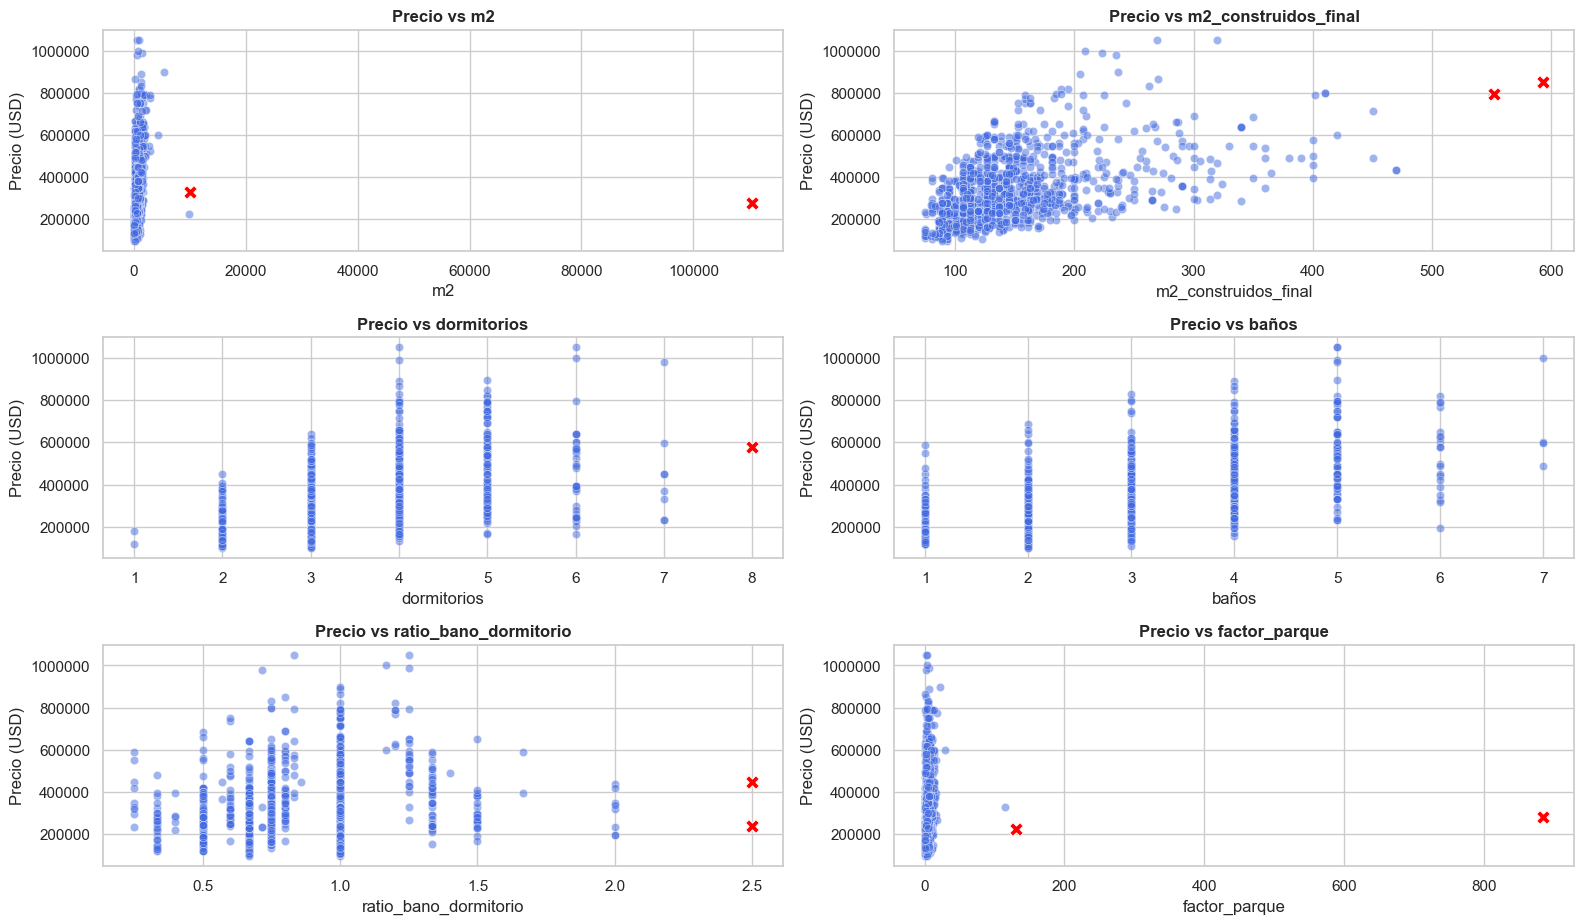


Variables Categóricas vs Precio


/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/3695492258.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=col, y='precio', order=order, palette='viridis')


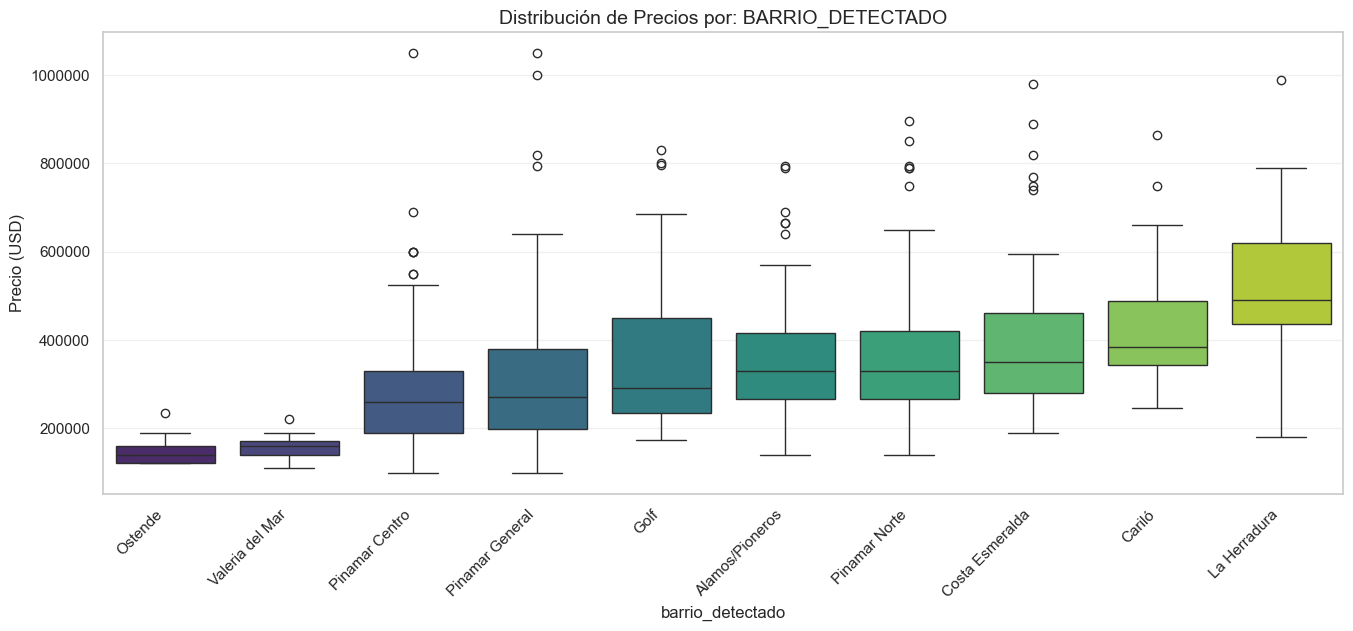

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/3695492258.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=col, y='precio', order=order, palette='viridis')


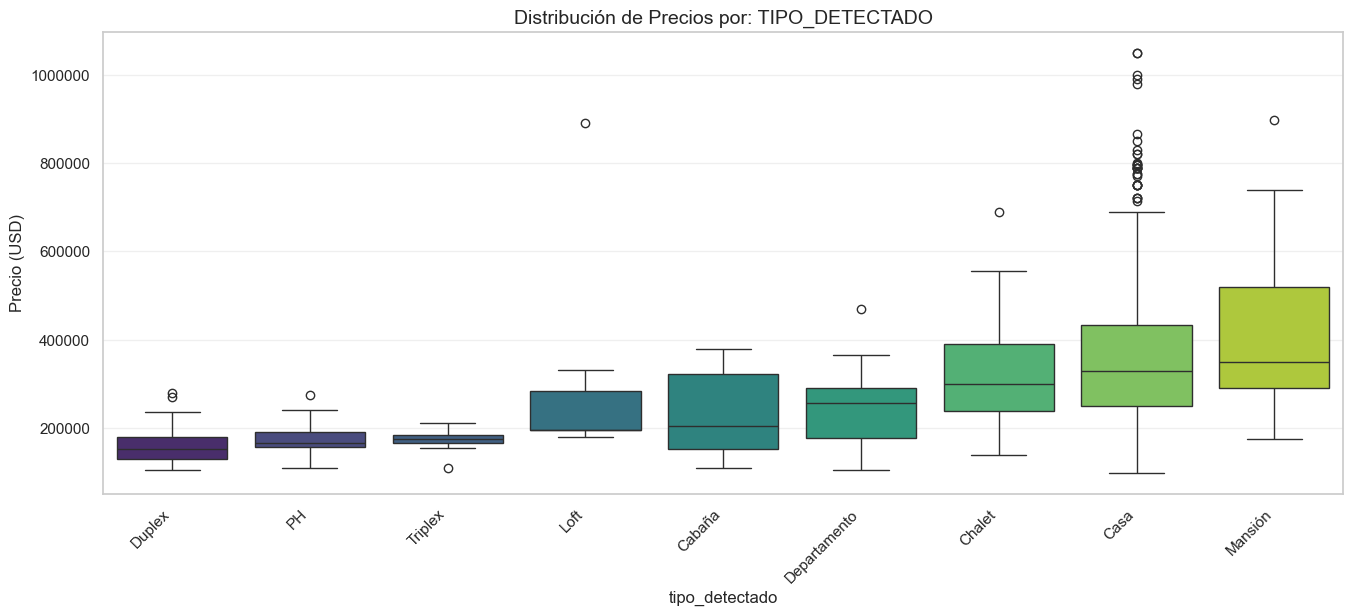

/var/folders/_3/9ky5qgzn2f733_p25r49fl700000gn/T/ipykernel_76230/3695492258.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x=col, y='precio', order=order, palette='viridis')


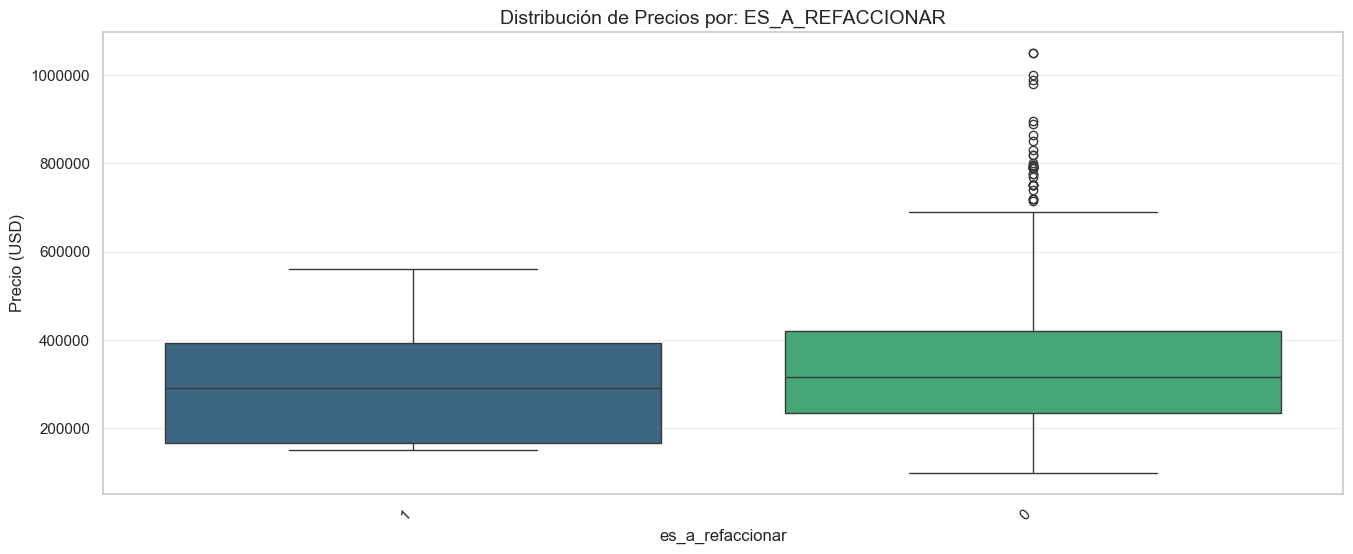


 PRECIO/M2 EXCESIVO (> 4.000 USD/m2): 62 casos
       precio  m2_construidos_final    precio_m2 barrio_detectado  \
609  665000.0                 133.0  5000.000000  Alamos/Pioneros   
67   665000.0                 133.0  5000.000000  Alamos/Pioneros   
986  660000.0                 133.0  4962.406015     La Herradura   

                                           descripcion  
609  Venta de Casa 4 dormitorios en Barrio Pioneros...  
67   Casa en venta barrio pioneros Se desarrolla en...  
986  Casa 5 ambientes en barrio cerrado la herradur...  

SUPERFICIES GIGANTES (> 5.000 m2): 4 casos
            m2    precio tipo_detectado  \
1157  110491.0  280000.0         Duplex   
787    10000.0  330000.0           Casa   
152     9957.0  225000.0           Casa   

                                            descripcion  
1157  Casa en venta a 200 metros del mar, salida Bal...  
787   Encantadora chacra de 10. 000 metros cuadrados...  
152   Epic Real Estate presenta fika haus, un desarr... 

In [47]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

cols_num_analisis = [
    'm2', 'm2_construidos_final', 'dormitorios', 'baños', 
    'antiguedad_detectada', 'ratio_bano_dormitorio', 'factor_parque'
]
cols_num_analisis = [c for c in cols_num_analisis if c in df_limpio.columns]

print("\nVariables Numéricas vs Precio ")

fig, axes = plt.subplots(nrows=len(cols_num_analisis)//2 + 1, ncols=2, figsize=(16, 4*len(cols_num_analisis)//2))
axes = axes.flatten()

for i, col in enumerate(cols_num_analisis):
    sns.scatterplot(data=df_limpio, x=col, y='precio', ax=axes[i], alpha=0.5, color='royalblue')
    
    axes[i].set_title(f'Precio vs {col}', fontweight='bold')
    axes[i].set_ylabel('Precio (USD)')
    axes[i].ticklabel_format(style='plain', axis='y') 

    limit_x = df_limpio[col].quantile(0.999)
    outliers = df_limpio[df_limpio[col] > limit_x]
    
    if not outliers.empty:
        sns.scatterplot(data=outliers, x=col, y='precio', ax=axes[i], color='red', s=100, marker='X')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

cols_cat_analisis = [
    'barrio_detectado', 'tipo_detectado', 
    'tiene_vista_mar_grado', 'es_lujosa_estricta', 
    'es_a_refaccionar'
]
cols_cat_analisis = [c for c in cols_cat_analisis if c in df_limpio.columns]

print("\nVariables Categóricas vs Precio")

for col in cols_cat_analisis:
    plt.figure(figsize=(16, 6))
    
    order = df_limpio.groupby(col)['precio'].median().sort_values().index
    
    sns.boxplot(data=df_limpio, x=col, y='precio', order=order, palette='viridis')
    plt.title(f'Distribución de Precios por: {col.upper()}', fontsize=14)
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, axis='y', alpha=0.3)
    
    plt.show()


# Precio por m2 absurdo 
df_limpio['precio_m2'] = df_limpio['precio'] / df_limpio['m2_construidos_final'].replace(0, 1)

# Muy Caros 
caros_m2 = df_limpio[df_limpio['precio_m2'] > 4000].sort_values('precio_m2', ascending=False)
if not caros_m2.empty:
    print(f"\n PRECIO/M2 EXCESIVO (> 4.000 USD/m2): {len(caros_m2)} casos")
    print(caros_m2[['precio', 'm2_construidos_final', 'precio_m2', 'barrio_detectado', 'descripcion']].head(3))

# Muy Baratos 
baratos_m2 = df_limpio[(df_limpio['precio_m2'] < 300) & (df_limpio['precio'] > 10000)].sort_values('precio_m2')
if not baratos_m2.empty:
    print(f"\nPRECIO/M2 IRRISORIO (< 300 USD/m2): {len(baratos_m2)} casos")
    print(baratos_m2[['precio', 'm2_construidos_final', 'precio_m2', 'barrio_detectado']].head(3))

# Superficies Gigantes
gigantes = df_limpio[df_limpio['m2'] > 5000].sort_values('m2', ascending=False)
if not gigantes.empty:
    print(f"\nSUPERFICIES GIGANTES (> 5.000 m2): {len(gigantes)} casos")
    print(gigantes[['m2', 'precio', 'tipo_detectado', 'descripcion']].head(3))

Filas antes: 1098
Filas después: 1095


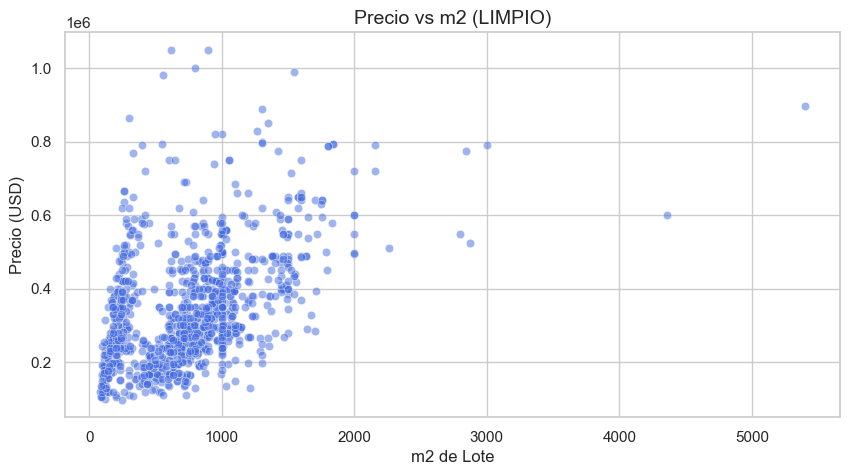

In [48]:
print(f"Filas antes: {len(df_limpio)}")

df_limpio = df_limpio[df_limpio['m2'] < 6000]
df_limpio = df_limpio[df_limpio['baños'] < 9]
df_limpio = df_limpio[df_limpio['m2_construidos_final'] < 2000]

print(f"Filas después: {len(df_limpio)}")

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_limpio, x='m2', y='precio', alpha=0.5, color='royalblue')
plt.title('Precio vs m2 (LIMPIO)', fontsize=14)
plt.xlabel('m2 de Lote')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()

In [49]:
cv_nuevo = (df_limpio['precio'].std() / df_limpio['precio'].mean()) * 100
print(f"Coeficiente de Variacion:")
print(f" {cv_nuevo:.2f}%")

Coeficiente de Variacion:
 44.74%


In [50]:
print(f"Total de Propiedades: {len(df_limpio)}")
print(f"Total de Columnas: {len(df_limpio.columns)}")
print("\nTipos de datos:")
print(df_limpio.dtypes)

Total de Propiedades: 1095
Total de Columnas: 46

Tipos de datos:
precio                       float64
m2                           float64
ambientes                    float64
dormitorios                    int64
baños                          int64
cocheras                     float64
direccion                     object
descripcion                   object
caracteristica                object
features_text                 object
texto_completo                object
es_a_refaccionar               int64
tiene_quincho                float64
m2_cubiertos_extract         float64
m2_construidos_final         float64
texto_analisis                object
pileta_m2_real               float64
tiene_jardin                   int64
estado_desc                   object
texto_full_mar                object
tiene_vista_mar                int64
es_cercano_mar                 int64
gas_natural                    int64
losa_radiante                  int64
porcentaje_cubierto          float64
es_ph_lof

In [51]:
columnas_a_eliminar = [
    'direccion', 'descripcion', 'caracteristica', 'features_text', 
    'texto_completo', 'texto_analisis', 'texto_full_mar', 'texto_full_ubicacion',
    'm2_cubiertos_extract'
]

df_modelo = df_limpio.drop(columns=columnas_a_eliminar)

In [52]:
df_modelo.to_csv('../data/ready-props-pinamar.csv', index=False)

print(f"Total de Propiedades: {len(df_modelo)}")
print(f"Total de Columnas: {len(df_modelo.columns)}")
print("\nTipos de datos:")
print(df_modelo.dtypes)

Total de Propiedades: 1095
Total de Columnas: 37

Tipos de datos:
precio                       float64
m2                           float64
ambientes                    float64
dormitorios                    int64
baños                          int64
cocheras                     float64
es_a_refaccionar               int64
tiene_quincho                float64
m2_construidos_final         float64
pileta_m2_real               float64
tiene_jardin                   int64
estado_desc                   object
tiene_vista_mar                int64
es_cercano_mar                 int64
gas_natural                    int64
losa_radiante                  int64
porcentaje_cubierto          float64
es_ph_loft                     int64
estilo_antiguedad             object
tipo_detectado                object
barrio_detectado              object
m2_no_construidos            float64
es_lujosa_hardware             int64
ratio_bano_dormitorio        float64
factor_parque                float64
tiene_seg